# Rules

## Theory

Here, the focus will be put on graphs with the following properties:
* binary: $s(v)\in \{0,1\}$
* d-regular: $\#N(v)=d$ 
* simple: 
    * $w(e_{i,j})\in \{0,1\}$
    * $w(e_{i,i})=0$
    * $w(e_{i,j})=w(e_{j,i})$

The **rules** that will be considered must:
* keep these properties invariant,
* be local to a vertex and its neighborhood,
* include only one type of topology altering operation called division.

The **division** operation consists of replacing a vertex by a complete subgraph of order $d$.

The state of a vertex being either dead or alive, and there being from 0 to $d$ alive vertices in its neighborhood, there are exactly $2(d+1)$ possible **local configurations** $c(v)$. These configurations can be ordered in the following way:

$$c(v)=(d+1)\times s(v)+\sum_{v_i\in N(v)} s(v_i)$$

This ordering makes it possible to compute a **configuration vector** $\mathcal{C}$ that can be used to update the graph:

$$\mathcal{C}=\begin{pmatrix} c(v_1) \\ \vdots \\ c(v_o) \end{pmatrix}=(d+1)\times\mathcal{S}+\mathcal{A}\cdot\mathcal{S}$$

Every d-regular rule must specify, for each configuration, whether the vertex will be alive or dead at $t+1$ and whether it will have undergone a division, leading to 4 possible final states. Thus, there are $4^{2(d+1)}$ possible rules. Each rule can be described by two functions:

$$
\begin{aligned}
& R: [[0,7]]\rightarrow\{0,\, 1\} \\  
& R(c(v_t))=s(v_{t+1}) 
\end{aligned}$$
$$\begin{aligned}
& R': [[0,7]]\rightarrow\{0,\, 1\} \\  
& R'(c(v_t))=\begin{cases}\begin{array}{ll}
        1, & \text{if c leads to a division at t+1}\\
        0, & \text{otherwise}
        \end{array}\end{cases}
\end{aligned}$$

Every d-regular rule can thus be labeled by a unique **rule number** $n$.

$$n=\sum_{i=0}^7 \left[ 2^i R(i) +  2^{i+2(d+1)} R'(i) \right]$$

```{note}
This labeling system, inspired by the Wolfram code {cite}`wolfram2002new`, is such that a rule number in its binary form displays the behavior of the rule. Starting from the right, the $2(d+1)$ first digits indicate the future state for each configuration as they have been ordered previously. The $2(d+1)$ following digits show when a division occurs.
```

## Implementation

The application of a rule to a graph will come in several steps which are strictly equivalent to the rule being applied all at once. The first step consists of computing a **configuration vector** $\mathcal{C}$.

$$\mathcal{C}=\begin{pmatrix} c(v_1) \\ \vdots \\ c(v_o) \end{pmatrix}
=(d+1)\times\mathcal{S}+\mathcal{A}\cdot\mathcal{S}$$

With @ the operator applying a function to every element of a vector, $\mathcal{S}$ can then be updated as follows.

$$\mathcal{S}=R\text{@}\mathcal{C}$$

A **division vector** $\mathcal{D}$ is computed similarly.

$$\mathcal{D}=R'\text{@}\mathcal{C}$$

Divisions can now be performed one by one as a combination of simple operations on matrices. The first 1 in $\mathcal{D}$ signals the vertex to divide. For the state vector, suffice to replicate the line corresponding to this vertex d times. For the adjacency matrix, both the line and the column must be replicated. Ones then have to be spread across these lines and columns and the intersection must be filled with a sub-matrix containing zeros on the diagonal and ones everywhere else. Finally, the first 1 in the division vector is turned into a 0 and then replicated. This process must be repeated until $\mathcal{D}$ is a null vector.

$$
\mathcal{S}: \quad
\begin{pmatrix}
    1 \\ {\color{red}0} \\ 0 \\ 0 
\end{pmatrix}
\rightarrow
\begin{pmatrix}
    1 \\ {\color{red}0} \\ {\color{red}0} \\ {\color{red}0} \\ 0 \\ 0
\end{pmatrix}
$$

$$
\mathcal{A}: \quad
\begin{pmatrix}
    0 & {\color{red}1} & 1 & 1 \\
    {\color{red}1} & {\color{purple}0} & {\color{red}1} & {\color{red}1} \\
    1 & {\color{red}1} & 0 & 1 \\
    1 & {\color{red}1} & 1 & 0
\end{pmatrix}
\rightarrow
\begin{pmatrix}
    0 & {\color{red}1} & {\color{orange}0} & {\color{orange}0} & 1 & 1 \\
    {\color{red}1} & {\color{purple}0} & {\color{purple}1} & {\color{purple}1} & {\color{orange}0} & {\color{orange}0} \\
    {\color{orange}0} & {\color{purple}1} & {\color{purple}0} & {\color{purple}1} & {\color{red}1} & {\color{orange}0} \\
    {\color{orange}0} & {\color{purple}1} & {\color{purple}1} & {\color{purple}0} & {\color{orange}0} & {\color{red}1} \\
    1 & {\color{orange}0} & {\color{red}1} & {\color{orange}0} & 0 & 1 \\
    1 & {\color{orange}0} & {\color{orange}0} & {\color{red}1} & 1 & 0
\end{pmatrix}
$$

$$
\mathcal{D}: \quad
\begin{pmatrix}
    0 \\ {\color{red}1} \\ 1 \\ 1 
\end{pmatrix}
\rightarrow
\begin{pmatrix}
    0 \\ {\color{red}0} \\ 1 \\ 1 
\end{pmatrix}
\rightarrow
\begin{pmatrix}
    0 \\ {\color{red}0} \\ {\color{red}0} \\ {\color{red}0} \\ 1 \\ 1
\end{pmatrix}
$$

```{tip} 
Implementing GRA rules must leverage a sparse array format to be efficient.
```

## Minimal graphs

Once a rule is defined, it is possible to search for interesting initial graphs. Here are some possible criteria :
* **configuration-complete**: the graph contains every possible local configuration,
* **color-symetric**: the graph stays the same under color-reversal,
* **small**: the graph contains the smallest number of vertices.

```{note}
The order of such a graph must necessarily exceed by at least two the number of possible configurations. Indeed, we saw that a d-regular graph has $2(d+1)$ possible local configurations. If the graph is configuration-complete, there is an alive vertex connected to d alive vertices and another connect to none. This makes for $d+2$ alive vertices and the same goes for dead vertices. Thus, a configuration complete graph must contain at least $2(d+2)$ vertices.
```

The function `minimal_regular_graphs(d)` computes the list of every d-regular graphs meeting the listed criteria.

In [1]:
import gra

graphs3 = gra.minimal_regular_graphs(3)
graphs4 = gra.minimal_regular_graphs(4)

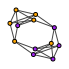

In [2]:
graphs4[0].plot()

## Rules and rule plots

The `Rule` class must be provided a **degree** and a **rule number**. The `.plot()` method can be used to generate a graphical representation of a rule's action on a graph.

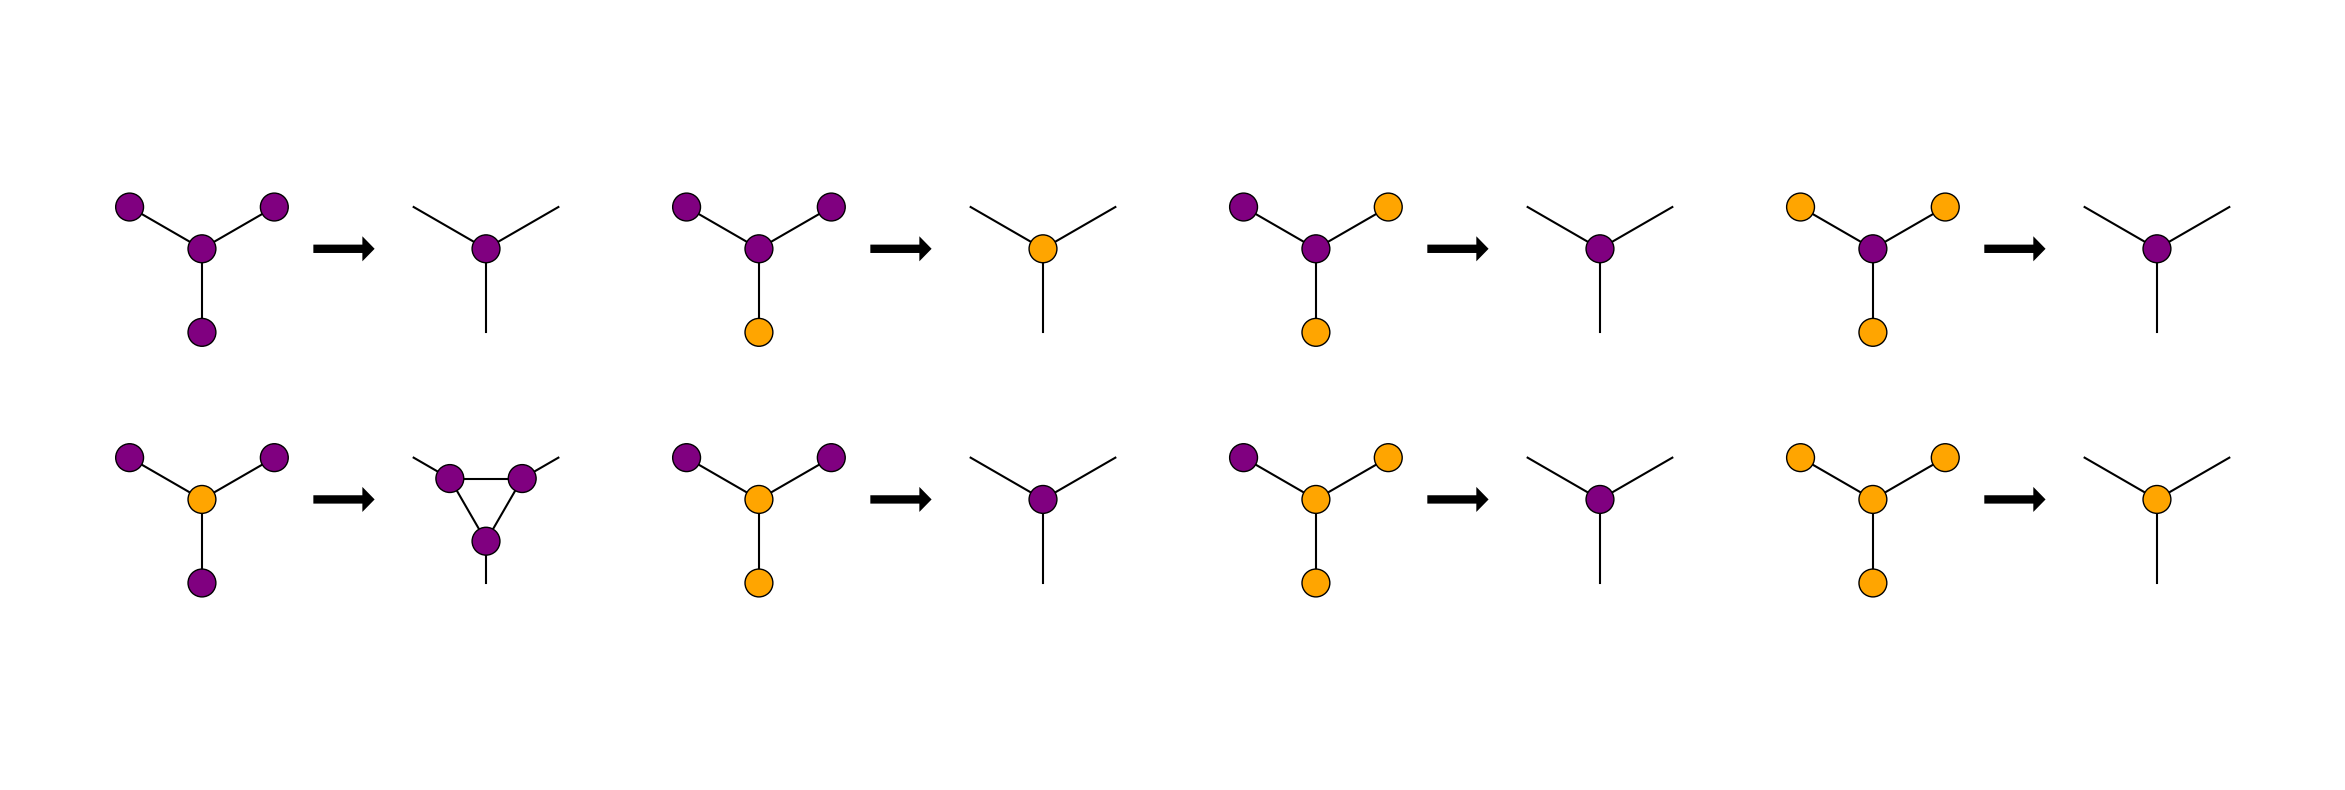

In [16]:
rule = gra.Rule(3,2238)
rule.plot()

We can now use this rule to evolve one of our 3-regular graphs.

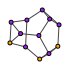

In [17]:
rule(graphs[1].clone()).plot()
# or equivalently: graphs[1].clone().evolve(rule).plot()

The `.jump()` method can be used to checkout the graph obtained by applying the rule n times.

In [22]:
graphs[1].clone().jump(rule,120).plot()
# or equivalently: rule.jump(graphs[1].clone(),120).plot()